In [21]:
# vgg16 pretrained param. download
!wget https://download.pytorch.org/models/vgg16-397923af.pth

--2024-02-08 01:34:54--  https://download.pytorch.org/models/vgg16-397923af.pth
Resolving download.pytorch.org (download.pytorch.org)... 18.160.200.112, 18.160.200.126, 18.160.200.71, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.200.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553433881 (528M) [binary/octet-stream]
Saving to: ‘vgg16-397923af.pth.1’

vgg16-397923af.pth. 100%[===================>] 527.79M  82.4MB/s    in 6.3s    

2024-02-08 01:35:01 (83.4 MB/s) - ‘vgg16-397923af.pth.1’ saved [553433881/553433881]



In [22]:
# metamath 구글 드라이브에서 개사진 다운
!gdown 1N2NOdbX6N2c2gSvS79FCeBPhlIIEFMbM

Downloading...
From: https://drive.google.com/uc?id=1N2NOdbX6N2c2gSvS79FCeBPhlIIEFMbM
To: /content/Rottweiler.jpg
100% 94.1k/94.1k [00:00<00:00, 104MB/s]


In [23]:
# metamath 구글 드라이브에서 label 파일 다운
!gdown 1TaBJsKVDz6t-FHzPgTQE9K-GLe_3zic-

Downloading...
From: https://drive.google.com/uc?id=1TaBJsKVDz6t-FHzPgTQE9K-GLe_3zic-
To: /content/imagenet-simple-labels.json
100% 14.2k/14.2k [00:00<00:00, 59.6MB/s]


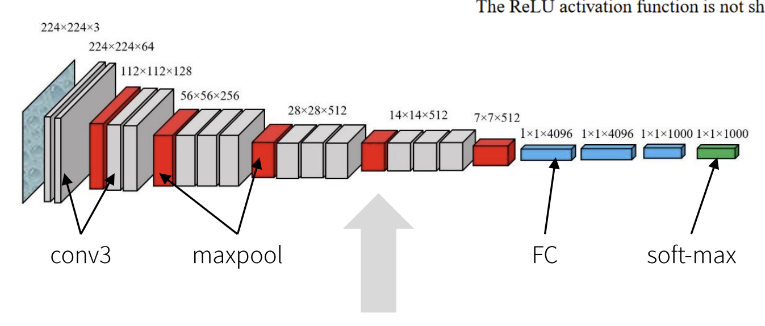

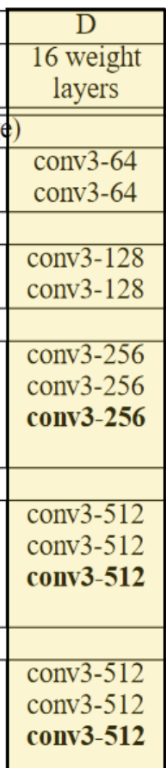

- 위 과정을 생성하는 실습

In [24]:
import torch
import torch.nn as nn

In [25]:
class Vgg16(nn.Module):
    def __init__(self):
        super().__init__()
        # 'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
        self.features = nn.Sequential(
            ########################################
            # WRITE YOUR CODE HERE
            # 위 주석 리스트에서 [64, 64, 'M'] 부분은 첫번째 conv층이 64채널을 출력하고
            # 두번째 conv층도 64채널을 출력한다는 의미입니다.
            # 'M'은 맥스풀링을 나타냅니다.
            # 슬라이드에 VGG16 그림을 참고하여 여기 그림과 위 주석에 출력 숫자와
            # 동일하게 CONV층으로 이뤄진 feature extractor를 구성하세요.
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), #(N, 64, 112, 112)

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), #(N, 128, 56, 56)

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 28

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 14

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # (N,512,7,7)

            ########################################
        )

        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            ########################################
            # WRITE YOUR CODE HERE
            # 여기서는 FC 레이어를 구성하세요.
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(),

            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),

            nn.Linear(4096, 1000),
            ########################################
        )

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        ########################################
        # WRITE YOUR CODE HERE
        # 구성된 레이어를 포워드 시키세요.
        x = self.features(x) #(N,3,224,224) (N,512,7,7)
        x = self.flatten(x)  # (N,512,7,7)  (N,25088)
        x = self.classifier(x) # (N,25088)   (N,1000)

        out = self.softmax(x)
        ########################################

        return out


In [26]:
vgg16 = Vgg16()

In [27]:
# 포워드 테스트
x = torch.rand(2, 3, 224, 224, dtype=torch.float32)

out = vgg16(x)

out.shape

torch.Size([2, 1000])

In [28]:
# param 로딩
data_path = "./"
vgg16.load_state_dict(torch.load(data_path+"vgg16-397923af.pth"))

<All keys matched successfully>

In [29]:
vgg16.eval()

Vgg16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), p

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_img( infilename , target_size=None ) :
    img = Image.open( infilename )

    if target_size != None :
        img = img.resize(target_size, Image.LANCZOS)

    data = np.asarray(img, dtype="float32") / 255.0

    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata, 0, 255), dtype="uint8"), "L" )
    img.save( outfilename )

def pre_process( x ) :
    # 이미지넷 사진들의 채널별 평균과 표준편차
    mean = [0.485, 0.456, 0.406]
    std  = [0.229, 0.224, 0.225]

    x[:, 0, :, :] -= mean[0]
    x[:, 1, :, :] -= mean[1]
    x[:, 2, :, :] -= mean[2]
    if std is not None:
        x[:, 0, :, :] /= std[0]
        x[:, 1, :, :] /= std[1]
        x[:, 2, :, :] /= std[2]

    return x

In [31]:
img_path = 'huge.jpg'

print("Image loading... default mode")
img = load_img(img_path, target_size=(224, 224))
print("img type :",type(img))
print("img dtype:",img.dtype)
print("img shape:",img.shape)


Image loading... default mode
img type : <class 'numpy.ndarray'>
img dtype: float32
img shape: (224, 224, 3)


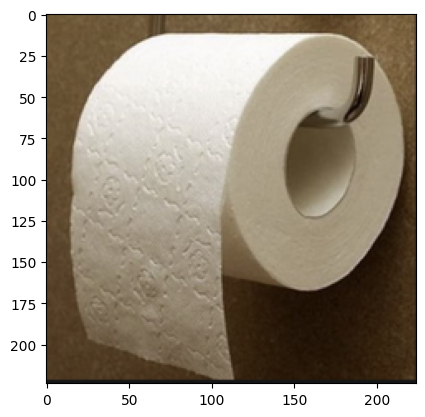

In [32]:
plt.imshow(img)

In [33]:
print("Image pre-prrocess default mode")
print("image shape:", img.shape)
img = img[np.newaxis, :] # (1, 224,224,3)
print("add batch dim:", img.shape)

# ch first
img = img.transpose(0, 3, 1, 2)
print("ch first:",img.shape)

img = pre_process(img)

Image pre-prrocess default mode
image shape: (224, 224, 3)
add batch dim: (1, 224, 224, 3)
ch first: (1, 3, 224, 224)


In [34]:
# 이미지를 torch.tensor로 바꾼다.
# 네트워크에 입력할 준비 끝
x = torch.from_numpy(img)
print("torch tensor shape:", x.shape, x.dtype)

torch tensor shape: torch.Size([1, 3, 224, 224]) torch.float32


In [37]:
# https://github.com/anishathalye/imagenet-simple-labels

# 클래스 레이블을 저장한 json파일 로드
import json

with open('./imagenet-simple-labels.json') as f:
    labels = json.load(f)

def id2label(i):
    return labels[i]

# 테스트
print(id2label(10))


brambling


In [38]:
out = vgg16(x)
print(out.shape)
id2label(torch.argmax(out, dim=1).item())

torch.Size([1, 1000])


'toilet paper'